# INFO-F-422 - Statistical Foundations of Machine Learning

## Classification Project

### Sassine Naim - ULB Computer Engineering - 440091 - nsassine@ulb.ac.be


### Introduction

With the rise in big data, machine learning has become a key technique for solving problems in multiple different areas, such as computational finance, image analysis, computational biology, natural language processing etc... It has become one of the exploited and promising fields of studies.

Largely, there are three major recognized categories: supervised learning, unsupervised learning, and reinforcement learning. For each and every categories, many approaches are currently studied and used in today's digital world. 

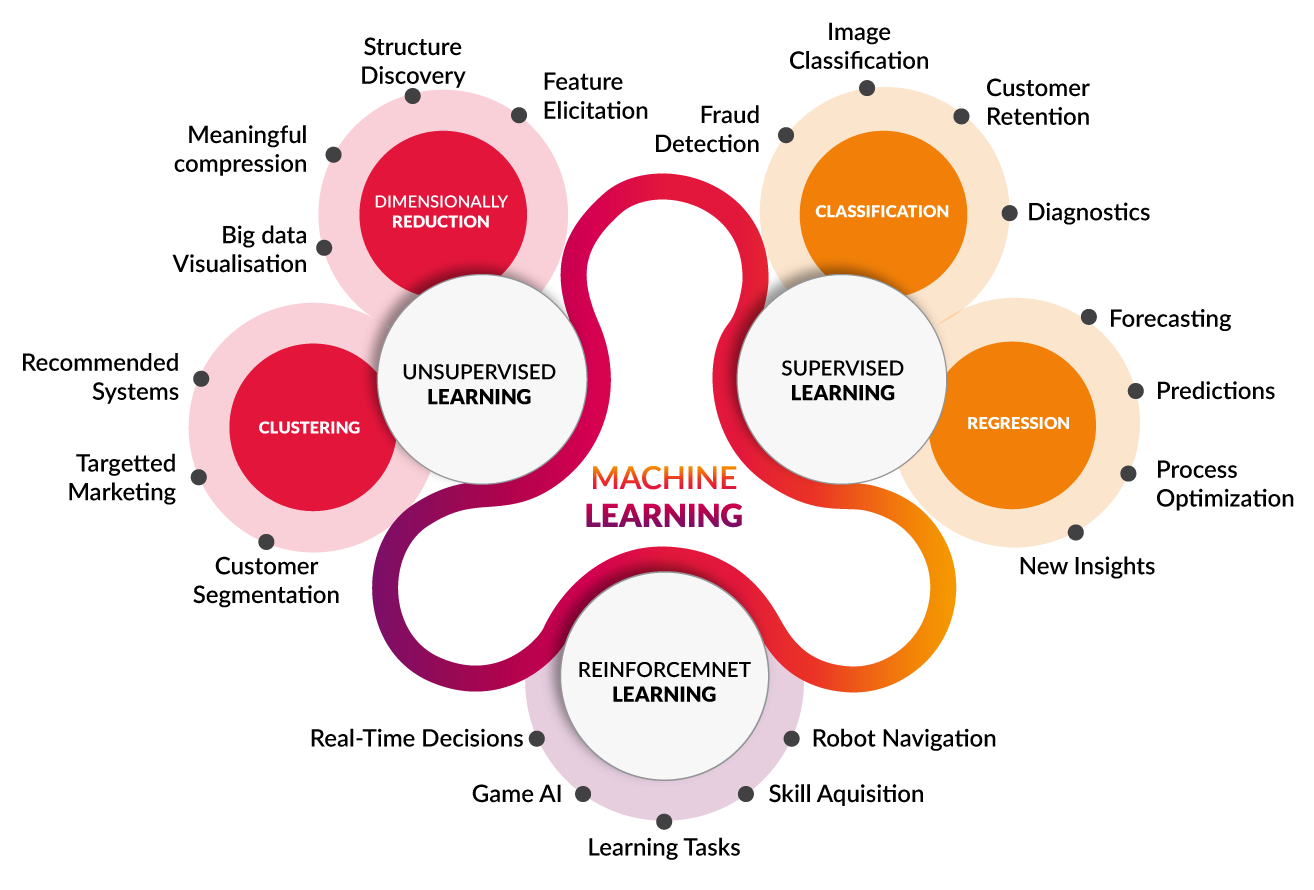

In [2]:
# Source : https://towardsdatascience.com/coding-deep-learning-for-beginners-types-of-machine-learning-b9e651e1ed9d
from IPython.display import Image
Image("Images/TML.png")

During this project, we will be focusing on Classification, which is a supervised machine learning approach, in which the algorithm learns from the data input provided to it and then uses this learning to classify new observations. This class of algorithms highly depends on the validty of the training data. In fact, mislabeled and noisy training data are a major source of classifier error due to the use of imprecise digital labeling tools and crowdsourced volunteers who are not adequately trained on or invested in the task. They could lead the model to a decrease in accuracy, wrong predictions as well as many unwanted side effects.

We will start this project by presenting three different algorithms used for classification : Logistic Regression, Support Vector Machines and the Random Forest classifier. We will then see how they perform on a real dataset, solving a real life problem. After that, we will focus on synthetic datasets that will help us analyse and differentiate in more details the algorithms, as well as answer the following problematic : What is the impact of noisy data on the performance of each of the algorithms listed above?

### Algorithms Presentation
#### Logistic Regression

Despite the name, Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. There are multiple types of logistic regression algorithms (binary, multi, ordinal), but here we will only focus on the binary logistic regression, since it is the one we use for classification in this project.

The Logistic Regression is similar to the Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function. Plus, the Linear Regression is not used for classification much. 

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression. 

The given 'Sigmoid function' maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities. 
$$ S(z) = 1/(1 + e^{-z})  $$

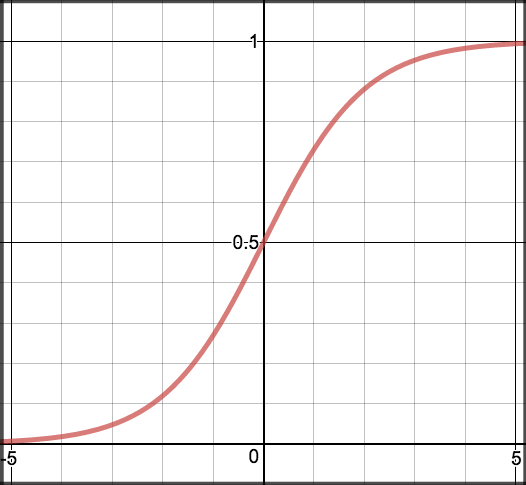

In [3]:
from IPython.display import Image
Image("Images/sigmoid.png")

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

$$ p≥0.5,class=1	p<0.5,class=0  $$

For example, if our threshold was 0.5 and our prediction function returned 0.7, we would classify this observation as positive. If our prediction was 0.2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.


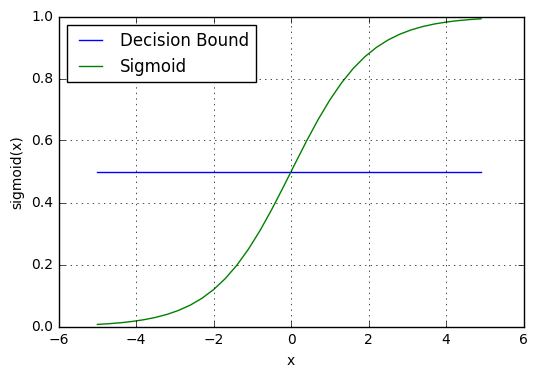

In [4]:
from IPython.display import Image
Image("Images/logistic_regression_sigmoid_w_threshold.png")

Let's use a different notation to get into more details : 
$$ h_\theta(x) = g(\theta^{T}x) $$

$$ g(z) = 1/(1 + e^{-z}) $$

Where x is the input (most probably x will be a matrix, since we will have multiple input parameters), $\theta$ is the weight matrix, and g the sigmoid function.

If we indicate a threshold of 0.5, we can easily see that : 
- if $h_\theta(x)$ $>=$ 0.5 (i.e $\theta^{T}$ $>=$ 0) we predict y = 1
- if $h_\theta(x)$ $<=$ 0.5 (i.e $\theta^{T}$ $<=$ 0) we predict y = 0

The goal of the logistic regression algorithm is to find , based on the training set, the best $\theta$s parameters in order to make the decision boundary actually separate the data points correctly. Those values, will be chosen in order to minimze errors.

We need to define a cost function and try to find the best possible values of each $\theta$ by minimizing the cost function output. The minimization will be performed by a gradient descent algorithm, whose task is to parse the cost function output until it finds the lowest minimum point.

Here, we cannot use the same cost function that is normally used in linear regression, that is because this same cost function is not convex in the case of logistic regression. A non convex cost function will make it very hard for the gradient descent to determine a minimum, since it could get stuck in a local minimum.

Given a generic dataset made of m examples : 

{(x(1),y(1)),(x(2),y(2)),…,(x(m),y(m))}
 
We define the logistic regression cost function as : 

$$ Cost(h_\theta(x),y) = $$ 
\begin{cases}
-\log(h_\theta(x)) & \text{if y = 1} \\
-\log(1-h_\theta(x)) & \text{if y = 0}
\end{cases}

In words this is the cost the algorithm pays if it predicts a value $h_\theta(x)$ while the actual cost label turns out to be 𝑦. By using this function we will grant the convexity to the function the gradient descent algorithm has to process, as discussed above. 

In case y = 1, the output (i.e. the cost to pay) approaches to 0 as $h_\theta(x)$ approaches to 1. Conversely, the cost to pay grows to infinity as $h_\theta(x)$ approaches to 0. This is a desirable property: we want a bigger penalty as the algorithm predicts something far away from the actual value. If the label is y = 1 but the algorithm predicts $h_\theta(x)$ = 0, the outcome is completely wrong.

Conversely, the same intuition applies when y = 0. Bigger penalties when the label is y = 0 but the algorithm predicts $h_\theta(x)$ = 1.


We finalise the definition of a cost function for logistic regression :

$$ Cost(h_\theta(x),y) = -y.log(h_\theta(x)) - (1-y).log(1-h_\theta(x)) $$

This function helps us map the difference between the result got from the sigmoid function $h_\theta(x)$, and the correct value from the training set y. 

With the optimization in place, the logistic regression cost function can be rewritten as:


$$ J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) 
 = - \dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1-h_\theta(x^{(i)}))] $$

 

What is left now is the gradient descent. This method will help us find the best values for $\theta$s parameters in the cost function, or in other words it will help us minimize the cost function.

To define it in proper words, the Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 

Here is a small graph visualising this technique.

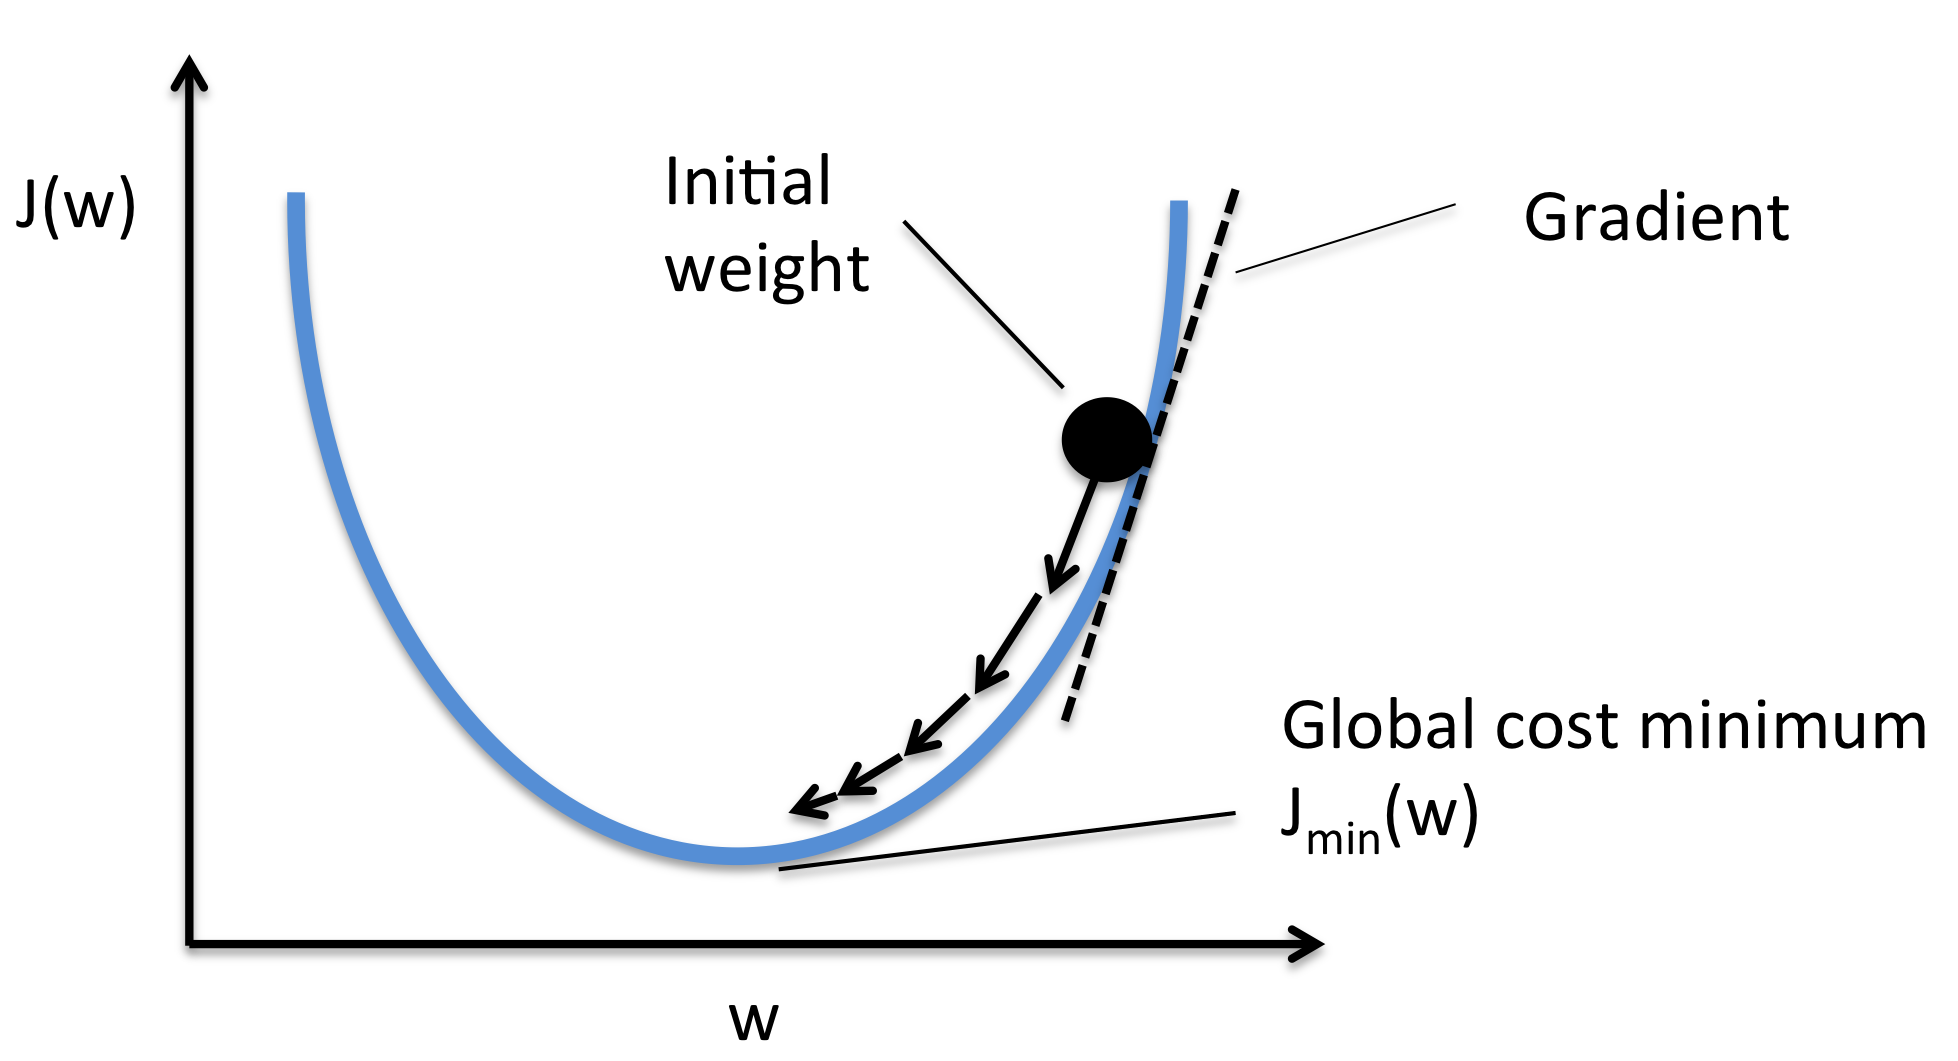

In [5]:
# Source = https://machinelearningnotepad.wordpress.com/2018/04/15/gradient-descent/
from IPython.display import Image
Image("Images/GD.png")

Formally, this technique involves a loop, and during each and every step of the loop, we try to minimize the cost function through the parameters, wich are the weights.

In our case, we need to repeat this loop until convergence (step j) : 

$$ \theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum \limits _{i=1} ^{m} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$$

#### Support Vector Machines
In the previous point, we explained clearly what Logistic Regression is. It helps solve classification problems separating the instances into two classes. However, there is an infinite number of decision boundaries, Logistic Regression only picks an arbitrary one. 

Logistic Regression doesn’t care whether the instances are close to the decision boundary. Therefore, the decision boundary it picks may not be optimal. The actual optimal decision boundary should be able to maximize the distance between the decision boundary and all instances. i.e., maximize the margins. That is what SVM does. 

Let us present Support Vector Machines more clearly. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

The objective of applying SVMs is to find the best line in two dimensions or the best hyperplane in more than two dimensions in order to help us separate our space into classes. The hyperplane (line) is found through the maximum margin. i.e the maximum distance between data points of both classes.

The vector points closest to the hyperplane are known as the support vector points because only these two points are contributing to the result of the algorithm, other points are not. If a data point is not a support vector, removing it has no effect on the model. On the other hands, deleting the support vectors will then change the position of the hyperplane. And that is why the technique is called "Support Vector Machines". (the following mathematical definition of SVM is inspired by the definition that the Professor gave in the "Assignments.pdf" document. I could not find a clearer representation of the problem, that is why I adapted it)


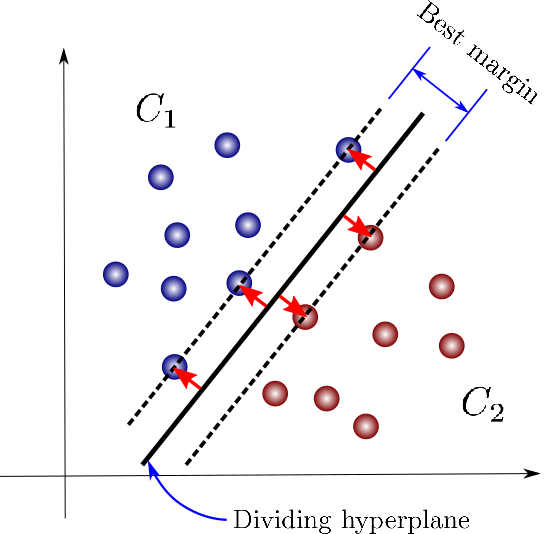

In [5]:
# Source = https://towardsdatascience.com/support-vector-machines-for-classification-fc7c1565e3
from IPython.display import Image
Image("Images/SVM.png")

Let {($x_n$, $y_n$)} be the training set, n = 1, · · · ,N ($x_n$ being real numbers and $y_n$ binary valued numbers).

The hypothesis set of the basic support vector machine or SVM is $H_{SVM}$ = {h $\in$ H : h(x) = sign($w^Tx+b$)}
where w is the weight vector orthogonal to the hyperplane h(x) = 0 and b is the intercept, the intersection of the hyperplane with the y-axis.

The basic SVM a classification algorithm that assumes that the data are linearly separable. It returns the maximum margin hyperplane. This is the solution to the constrained optimization problem :
Minimize the objective function : 
$$\frac{1}{2} w^Tw$$ 
subject to the constraints :
$$ y_n(w^Tx_n+b) \geq 0 $$ for n = 1, ..., N

The basic SVM can be extended in 2 ways. 
A first way is to apply a non-linear transformation 
$$ \Phi : X -> Z : x -> z = \Phi(x) $$
from the input space to the feature space. The maximum margin separation is done in Z. 
SVM uses the kernel trick to accomplish this. A kernel function : 
$$ K : X x X -> R $$
is positive definite : 
$$K(x,x') > 0$$
for all non-zero vectors $x,x' \in X$ 

A kernel K induces a transformation $\Phi_K$ to a feature space $Z_K$ but both are left implicit. 

The polynomial kernel 

$$ K_{poly}(x,x') = (x^Tx' + 1)^d $$

where d is a positive integer, and the radial basis kernel
$$ K_{rb}(x,x') = exp(-\gamma ||x-x'||^2) $$
where $\gamma$ > 0 is a real constant, are examples. 

The final hypothesis when using kernel K is 

$$ g(x) = sign(\sum \limits _{\alpha_n>0} (\alpha_n y_n K(x_n,x) + b)) $$

where $$ b = y_s - \sum \limits _{\alpha_n>0} (\alpha_n y_n K(x_n,x))$$
for any of the support vectors $x_s$, i.e. $\alpha_s$.
Note that although the maximum margin separation takes place in the feature space $Z_K$ all computations in the equation above are done in the input space X.

The second extension is to allow misclassifications. Each $x_n$ has an associated slack variable $\xi_n \geq 0$ that measures the degree of misclassification : if  $\xi_n > 0$, x is misclassified, otherwise x is classified correctly and $\xi_n = 0$. 
The original optimization problem defined above becomes : 
Minimize the objective function : 

$$\frac{1}{2} w^Tw  +  C\sum \limits _{\alpha_n>0} ^{N} \xi_n $$ 

subject to the constraints :

$$ y_n(w^Tx_n+b) \geq 1 - \xi_n $$

$$ \xi_n \geq 0 $$
for n = 1, ..., N.

The added term in the equation to be minimized is the the product of the box constraint C > 0, a user defined parameter, and the total amount of misclassification. When C = 0 no misclassifications are allowed.

#### Random Forest Classifier 
Before getting into the third algorithm used in this project, let us present Decision Trees, as they are the building blocks of the random forest model. We are going to introduce this model via an example, since it is the easiest way to do it. 

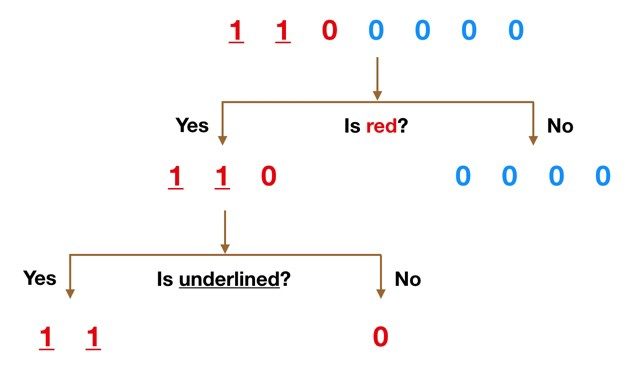

In [6]:
# https://towardsdatascience.com/understanding-random-forest-58381e0602d2
from IPython.display import Image
Image("Images/DT.jpeg")

Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not. So how can we do this?

Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.

The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.
The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly. Victory!
Obviously in real life our data will not be this clean but the logic that a decision tree employs remains the same. At each node, it will ask : what feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?

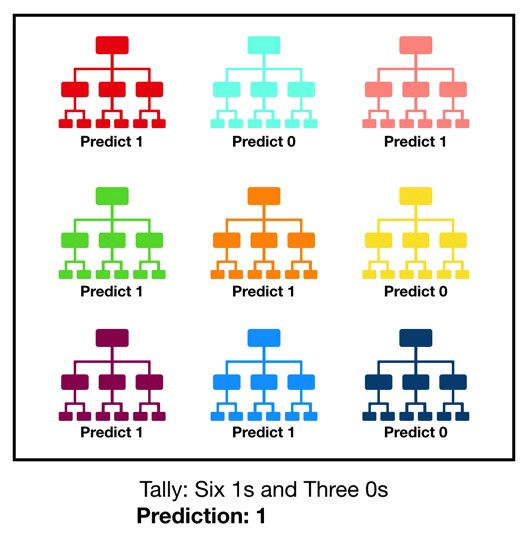

In [7]:
# https://towardsdatascience.com/understanding-random-forest-58381e0602d2
from IPython.display import Image
Image("Images/RFT.jpeg")

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure above).

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: 
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

1- There needs to be some actual signal in our features so that models built using those features do better than random guessing.
2- The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


### Using the Algorithm to Solve a Real-Life Problem
In the section below, we will use the three algorithms presented to predict, based on diagnostic measurements, whether a patient has diabetes or not.
The dataset used here is a dataset from Kaggle, that I will show how to import down below. All patients included in this dataset are at least, 21 years old females, of Pima Indian heritage. Indeed, this dataset was specilly conducted for the Pima Indians of Arizona and Mexico, since they have the highest reported prevalence of diabetes of any population in the world.
#### The Imports 

In [7]:
# We will use numpy and pandas, two of the most common libraries for data manipulation. 
# We use scikit-learn, a popular machine learning library, for creating and evaluating the models. 
# Matplotlib is used for model visualization.


import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns # this library will help us build the confusion matrix and some graphs
import time
import warnings
warnings.filterwarnings("ignore")
# all the imports below are from sklearn, they will be used to build, train, test, validate, visualise our models
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import *
from inspect import signature
SEED = 42

/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [12]:
# The .csv file containing the dataset can be found in the folder containing this notebook.
# If you wish to re-download the dataset, just execute the commands below. 
import io
import requests
url="https://raw.githubusercontent.com/naimsassine/ProjetMLClassification/master/diabetes.csv?token=AJFAZYWRTZVX657WZ2REKZS63VDZY"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

#### Data Overview 
In the section below, we will analyse our data, have more insight on it, eliminate the zeros that will affect the training accuracy and finally use a Random Forst Classifier to detect the top features of our dataset and perfrom a variable selection.

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64
0    500
1    268
Name: Outcome, dtype: int64


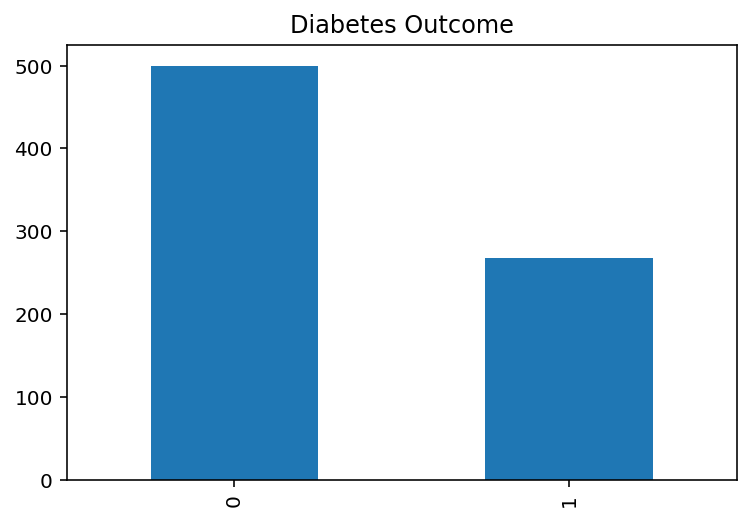

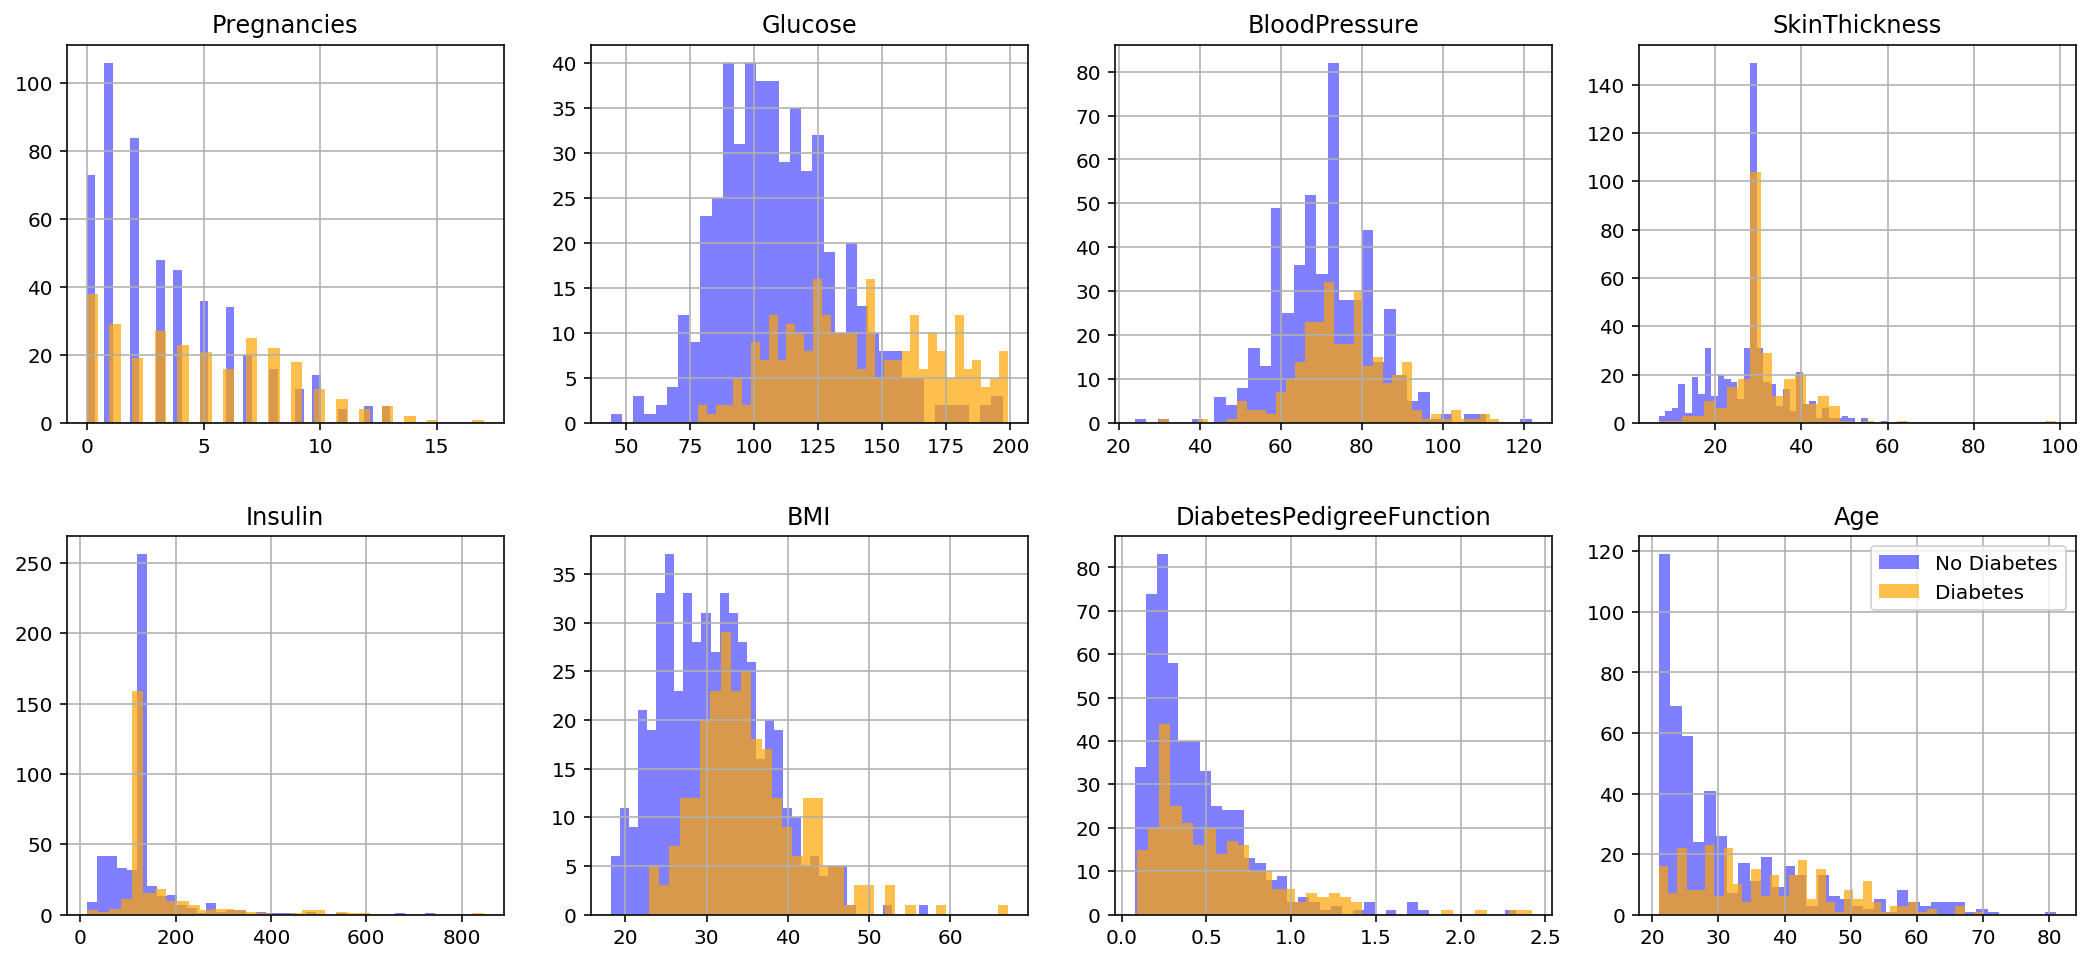

In [8]:
df = pd.read_csv('Datasets/diabetes.csv')  

# data overview
df.head()

print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

# '0'= no diabetes; '1'= diabetes
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind = 'bar').set_title('Diabetes Outcome')


# There are some zeros in the data set, 
# which will affect the training accuracy. 
# A way to proceed is to remplace them with the median value

df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)



# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    

    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)



Text(0.5, 1.0, 'Top Features derived by Random Forest')

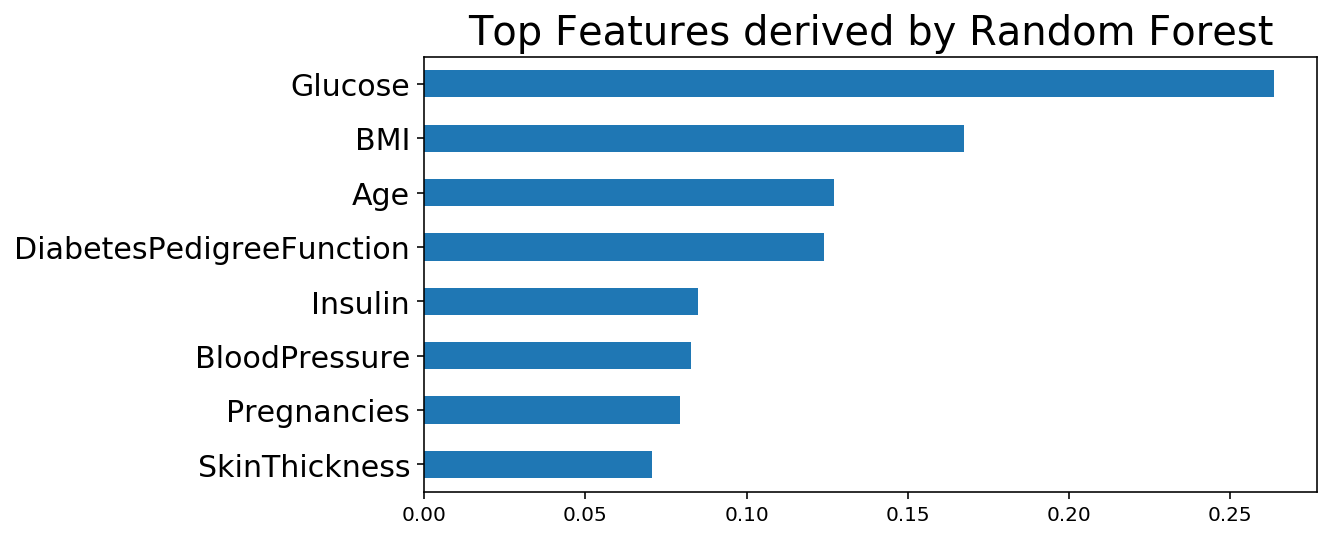

In [14]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100) 
# we use here a RFC to study the top features of the dataset
# this will not only give us an insight on the data, but could be also useful in data preparation process
rfc_model = rfc.fit(X, y)
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(8)
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis())
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

#### Training, Testing and Validating the Models 
Now that we have a good overiew on the different algorithms that we want to use in this project, as well as the real dataset that is being studied, let us see how this algorithms will perfrom on this dataset to try and resolve the prediction of diabetes problem.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
#We Specify “stratify=y” for imbalance dataset, this will ensure that the output of the split still maintains 
#the same proportion of class ‘1’ and class ‘0’

In [16]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)


# so here we create a function called baseline_report that will practically do everything for us, it will take 
# a model, train it, and use cross validation, to determine the different paramters

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train) # train the model
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    df_model = pd.DataFrame({'Model'        : [name],
                             'Accuracy'     : [accuracy],
                             'Precision'    : [precision],
                             'Recall'       : [recall],
                             'F1 Score'      : [f1score],
                             'ROC AUC'       : [rocauc],
                             'Log Loss'      : [logloss]})   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models
logit = LogisticRegression()
randomforest = RandomForestClassifier()

svmDB = svm.SVC(kernel='linear')
df_models = pd.concat([baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svmDB, X_train, X_test, y_train, y_test, 'Support Vec Machine')
                      ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss
0,LogisticRegression,0.784979,0.759512,0.570100,0.648323,0.840969,10.316886
1,RandomForest,0.775250,0.690349,0.574751,0.625340,0.823309,9.195477
2,Support Vec Machine,0.786605,0.765766,0.565449,0.649113,0.843380,10.541154


The performance metrics used in the evaluation are:
- Accuracy Score: proportion of correct predictions out of the whole dataset. 
- Precision Score: proportion of correct predictions out of all predicted diabetic cases.
- Recall Score: proportion of correct predictions out of all actual diabetic cases. 
- F1 Score: optimised balance between Precision and Recall for binary targets.
- Area Under ROC Curve: prediction scores from area under Receiver Operating Characteristic 
- Log Loss: logistic loss or cross-entropy loss, defined as the negative log-likelihood 
of the true labels given a probabilistic classifier’s predictions, and has to be as low as possible.

Our models perform differently at multiple levels. SVM is the most precise here, and the most accurate. Random Forest takes a lot more time than the other two, and is the least precise. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It is a really important performance metric since it provides tools to select possibly optimal models and to discard suboptimal ones independently from the cost context or the class distribution. In our case, SVM and LR are pretty close in term of ROC AUC, but Random Forest falls a little bit behind.

We can clearly see that the accuracy of our models is not very high. Indeed 70% is not always tolerable in machine learning, depends on the context. Many things can affect this value here, like the number of training samples, which is not very high here (768). But also, multiple parameters can affect this value, and tuning them could help us get a better accuracy. Let us use cross-validation to tune these hyperparameters and get better models. Cross validation is a technique that we use to avoid overfitting. It is not the main idea here, so we won't get into details, but we basically use cross-validation to tune different hyperparameters to get a better model. The technique is described in the image below. 

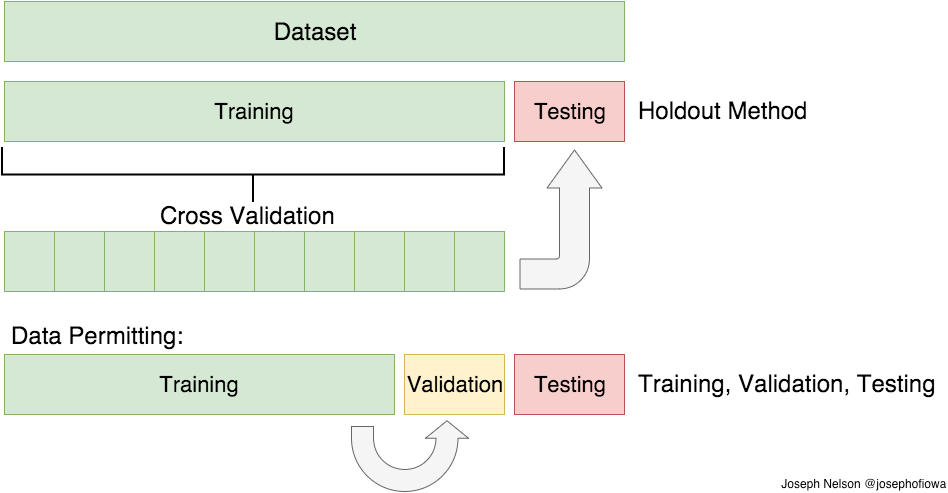

In [17]:
from IPython.display import Image
Image("Images/TVT.png")

In [20]:
# for the three models, we do similar stuff
# we cann the KFOLD function,
# we generate a set of values to test the different parameters
# and then we use the cross_val_score to compare these different values 
# taken by the parameters

print(' LogisticRegression ')
time1 = time.time()
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)

print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

 
 LogisticRegression 

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
optimal cv F1 score = 0.6634
optimal value of C = 0.013


In [21]:
print('RandomForestClassifier')
time1 = time.time()
print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
print('optimal F1 score = {:.4f}'.format(max(score_list)))
optimal_n = int(n_list[score_list.index(max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

RandomForestClassifier

Search for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data
optimal F1 score = 0.6301
optimal n_estimators = 100


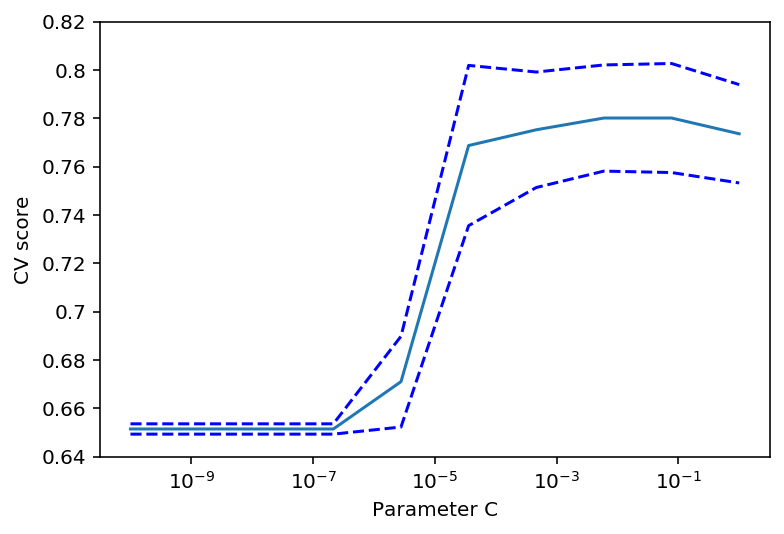

In [24]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_train, y_train, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.show()

### What is the impact of noisy data on the performance ?
We already presented three different classification algorithms, we then trained all three of them on a real dataset, and tested the different models to see how accurate they were and how different their performances were. We also used cross-validation to tune their parameters. But, on a real dataset, we cannot really evaluate the performance of our models. We cannot see how they perform on specific datasets, facing specific problems.

For example, imagine you want to check whether Logistic Regression can do well given just 100 data-points and 2 features? Now either you can search for a 100 data-points dataset, or you can use your own dataset that you are working on. But how would you know if the classifier was a good choice, given that you have so less data and doing cross validation and testing still leaves fair chance of overfitting? Generating synthetic data, is the answer to those questions. 

In fact, finding a real dataset that would meet the specific requirements to test a model on different levels, is extremly hard. Data generators help us create data with different distributions and profiles to experiment on.

In our case, we want to study and analyse the impact of noisy data on the performance of our different models. Since noisy data can be in many different forms, data generators will give us the chance to create specific synthetic datasets that will test specific capabilities of our models.

In this part of the project, we will generate different datasets to try and answer the following question : 
<h4><center>What is the impact of noisy data on the performance of the three models presented?</center></h4>

Before we get started, let us present the different and illustrate tools that we will use to comapre the models. 
- The accuracy of the model (we already talked about this metric in the previous section)
- The confusion matrix : allows visualization of the performance of an algorithm
- ROC : the receiver operating characteristic curve is another common tool used with binary classifiers. The dotted line (that will appear on the graphs below) represents the ROC curve of a purely random classifier. A good classifier stays as far away from that line as possible (toward the top-left corner).
- Decision Boundaries : illustrates on a graph how our models classifies the given datapoints

Let us illustrate these metrics on a concrete example, using logistic regression. 

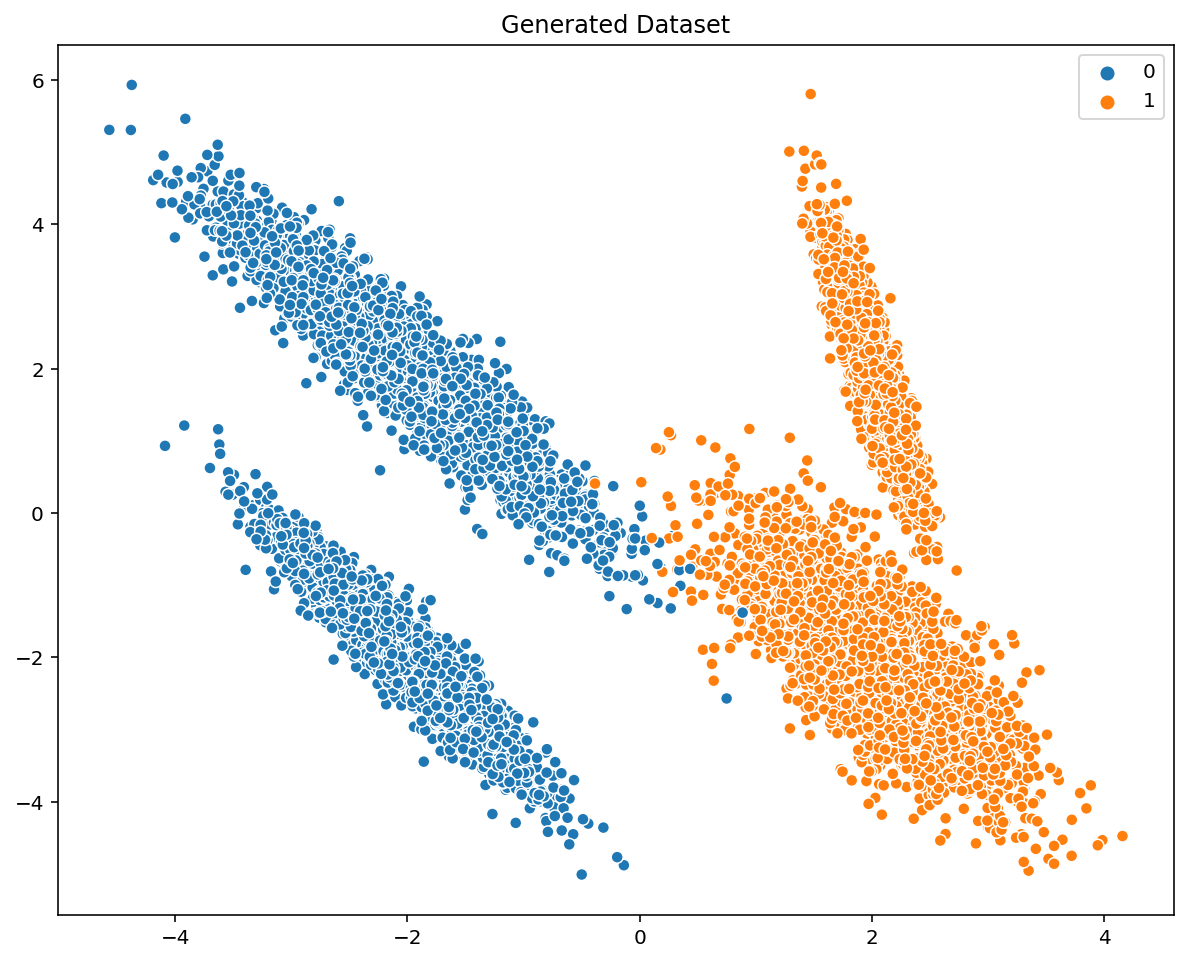

In [32]:
# Easy decision boundary
# make_classification is a sklearn method that generates synthetic datasets
X1,y1 = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(10,8))

sns.scatterplot(X1[:,0],X1[:,1],hue=y1,ax=ax1);
ax1.set_title("Generated Dataset");

X1,y1 = pd.DataFrame(X1),pd.Series(y1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test) # the Score method returns the mean accuracy on the given test data and labels
print("Accuracy of the model : ", score) 

Accuracy of the model :  0.9996


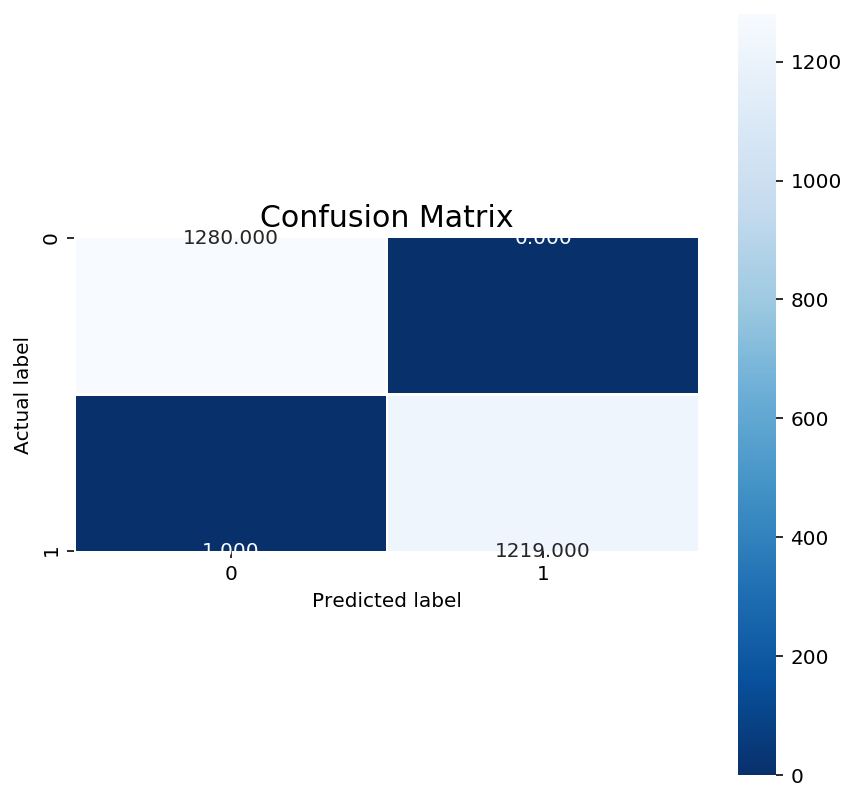

In [34]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.7, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);


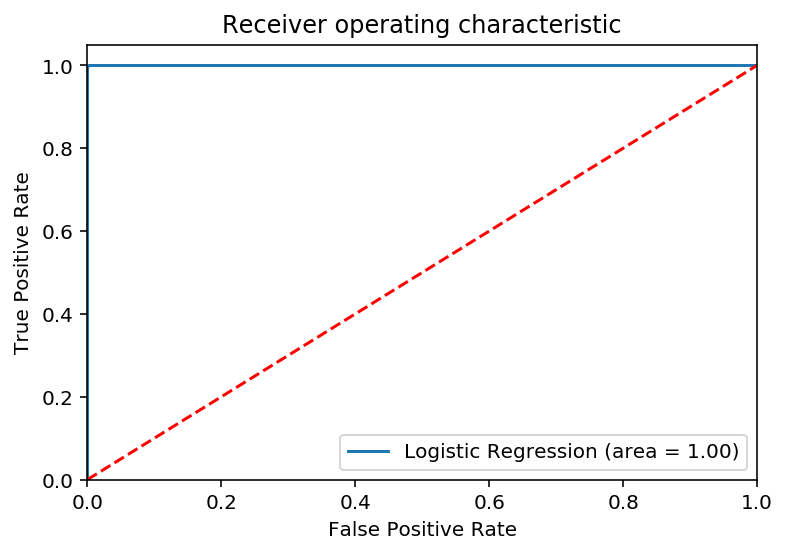

In [35]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In our case, the model is near perfect, it has a very high accuracy and that is why the curve looks like a straight line. But it's not always the case! The dataset was just easily separable by the model.

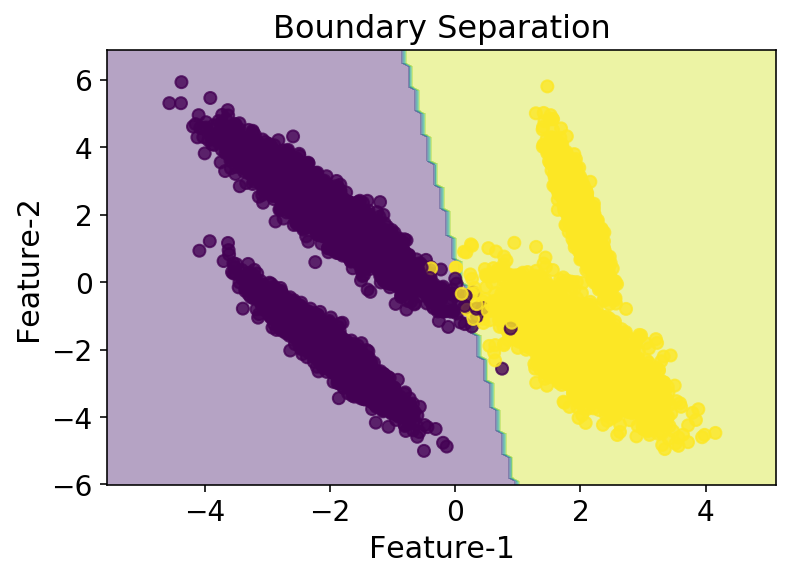

In [36]:
# code inspired by https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508
def plot_decision_boundaries(X, y, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

plt.figure()
plt.title("Boundary Separation",fontsize=16)
plot_decision_boundaries(X1,y1,LogisticRegression)
plt.show()

Now that we presented the different metrics and graph that we will use, we are all set and ready to answer our problematic question.

<h4><center>What is the impact of noisy data on the performance of the three models presented?</center></h4>

So what is noise? 
Noise is the random irregularity we find in any data, it has no pattern. It is a term that came from signal processing, and is used to illustrate the external addition to variability. 


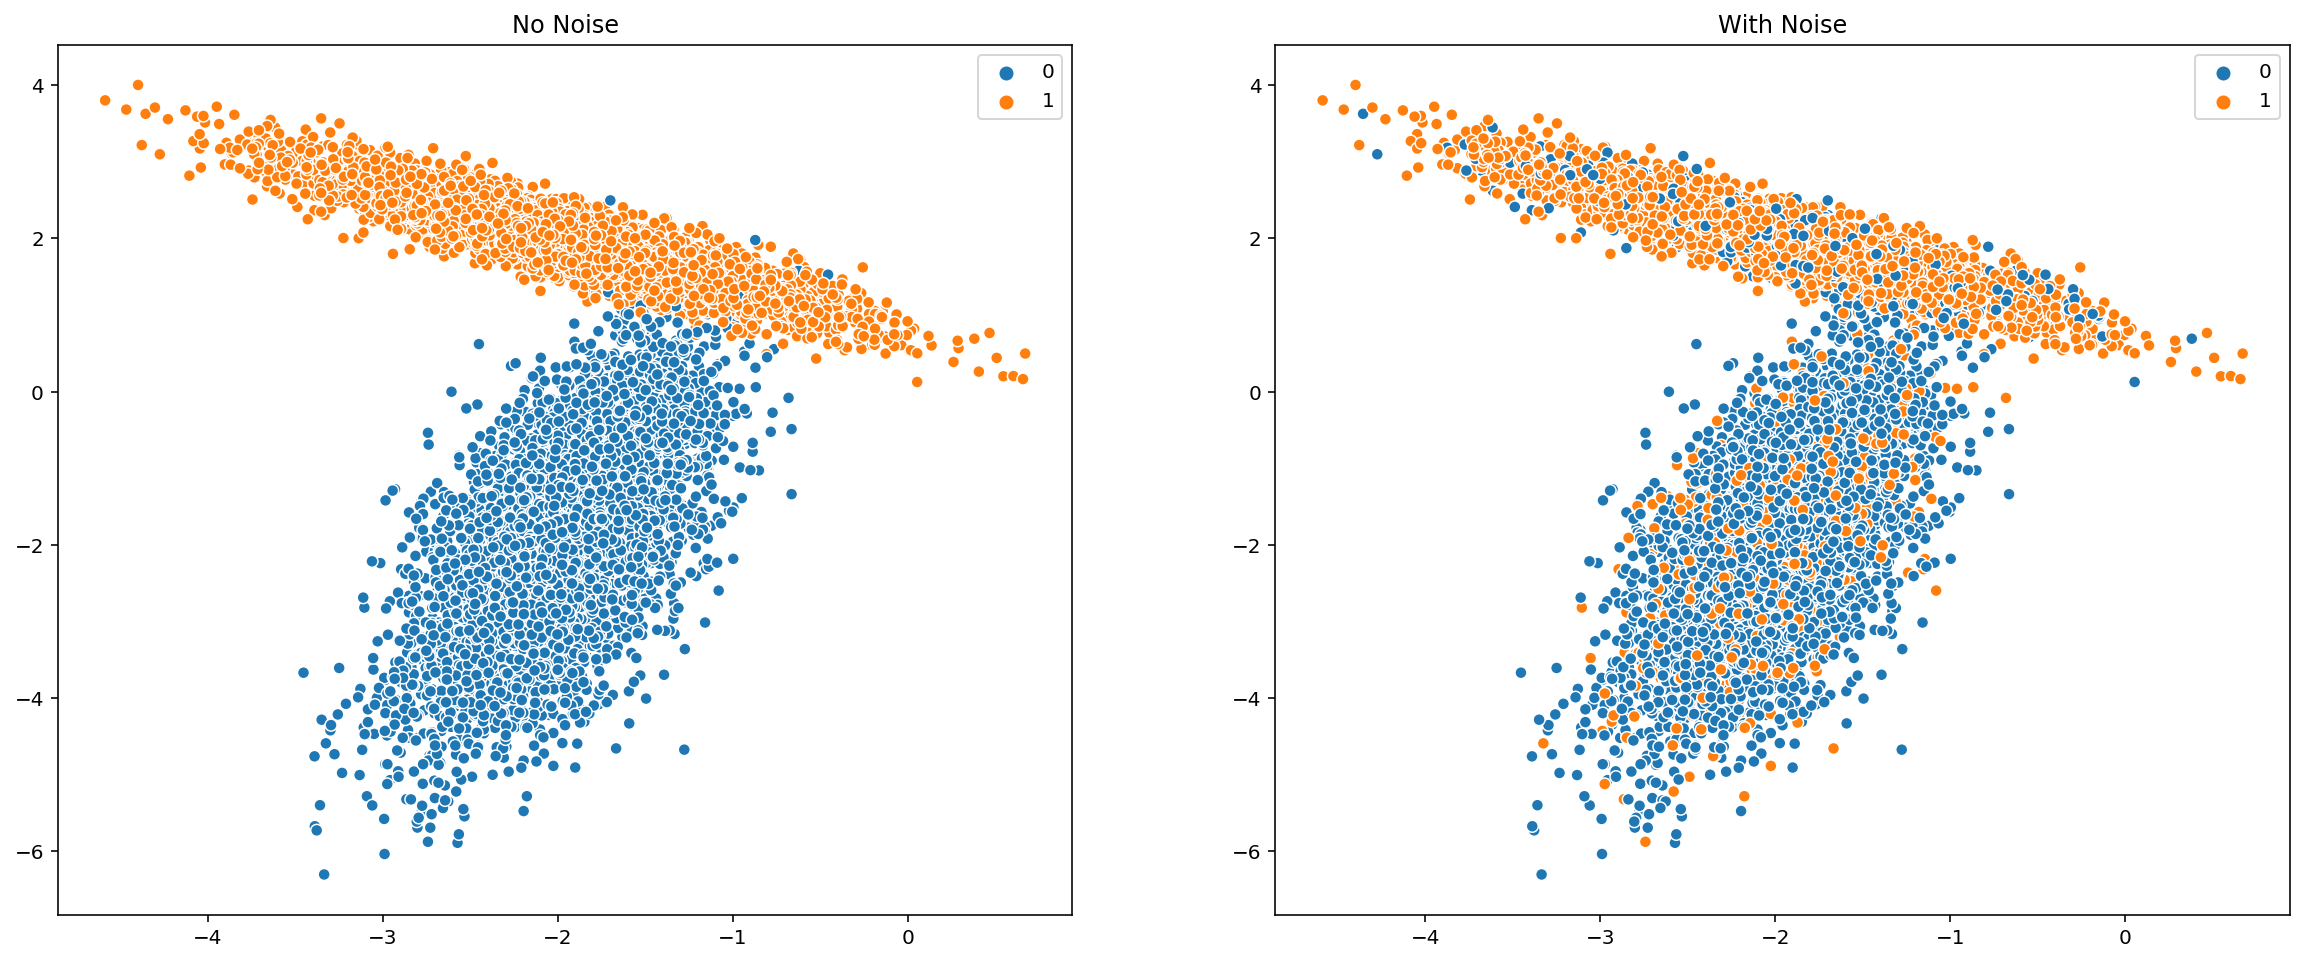

In [44]:
# Generate Clean data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=2, flip_y=0, weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# Generate noisy Data
XN,yN = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=2, flip_y=0.3, weights=[0.5,0.5], random_state=17)
sns.scatterplot(XN[:,0],XN[:,1],hue=yN,ax=ax2);
ax2.set_title("With Noise");
plt.show();

In [45]:
xnn_train, xnn_test, ynn_train, ynn_test = train_test_split(X, y, test_size=0.25, random_state=0) # without noise
xN_train, xN_test, yN_train, yN_test = train_test_split(XN, yN, test_size=0.25, random_state=0) # with noise

logisticRegr = LogisticRegression()
logisticRegrN = LogisticRegression()

logisticRegr.fit(xnn_train, ynn_train)
predictionsLR = logisticRegr.predict(xnn_test)
scoreLR = logisticRegr.score(xnn_test, ynn_test)

logisticRegrN.fit(xN_train, yN_train)
predictionsLRN = logisticRegrN.predict(xN_test)
scoreLRN = logisticRegrN.score(xN_test, yN_test)


svmn = svm.SVC(kernel='linear')
svmN = svm.SVC(kernel='linear')

svmn.fit(xnn_train, ynn_train)
predictionsSVM = svmn.predict(xnn_test)
scoreSVM = svmn.score(xnn_test, ynn_test)

svmN.fit(xN_train, yN_train)
predictionsSVMN = svmN.predict(xN_test)
scoreSVMN = svmN.score(xN_test, yN_test)


randomforest = RandomForestClassifier()
randomforestN = RandomForestClassifier()

randomforest.fit(xnn_train, ynn_train)
predictionsRM = randomforest.predict(xnn_test)
scoreRM = randomforest.score(xnn_test, ynn_test)

randomforestN.fit(xN_train, yN_train)
predictionsRMN = randomforestN.predict(xN_test)
scoreRMN = randomforestN.score(xN_test, yN_test)

print("Accuracy of Logistic Regression without noise : ", scoreLR) 
print("Accuracy of Logistic Regression with noise : ", scoreLRN) 
print("\n")
print("Accuracy of SVM without noise : ", scoreSVM) 
print("Accuracy of SVM with noise : ", scoreSVMN)  
print("\n")
print("Accuracy of Random Forest without noise : ", scoreRM) 
print("Accuracy of Random Forest with noise : ", scoreRMN) 

Accuracy of Logistic Regression without noise :  0.9948
Accuracy of Logistic Regression with noise :  0.8288


Accuracy of SVM without noise :  0.9952
Accuracy of SVM with noise :  0.8268


Accuracy of Random Forest without noise :  0.9952
Accuracy of Random Forest with noise :  0.82


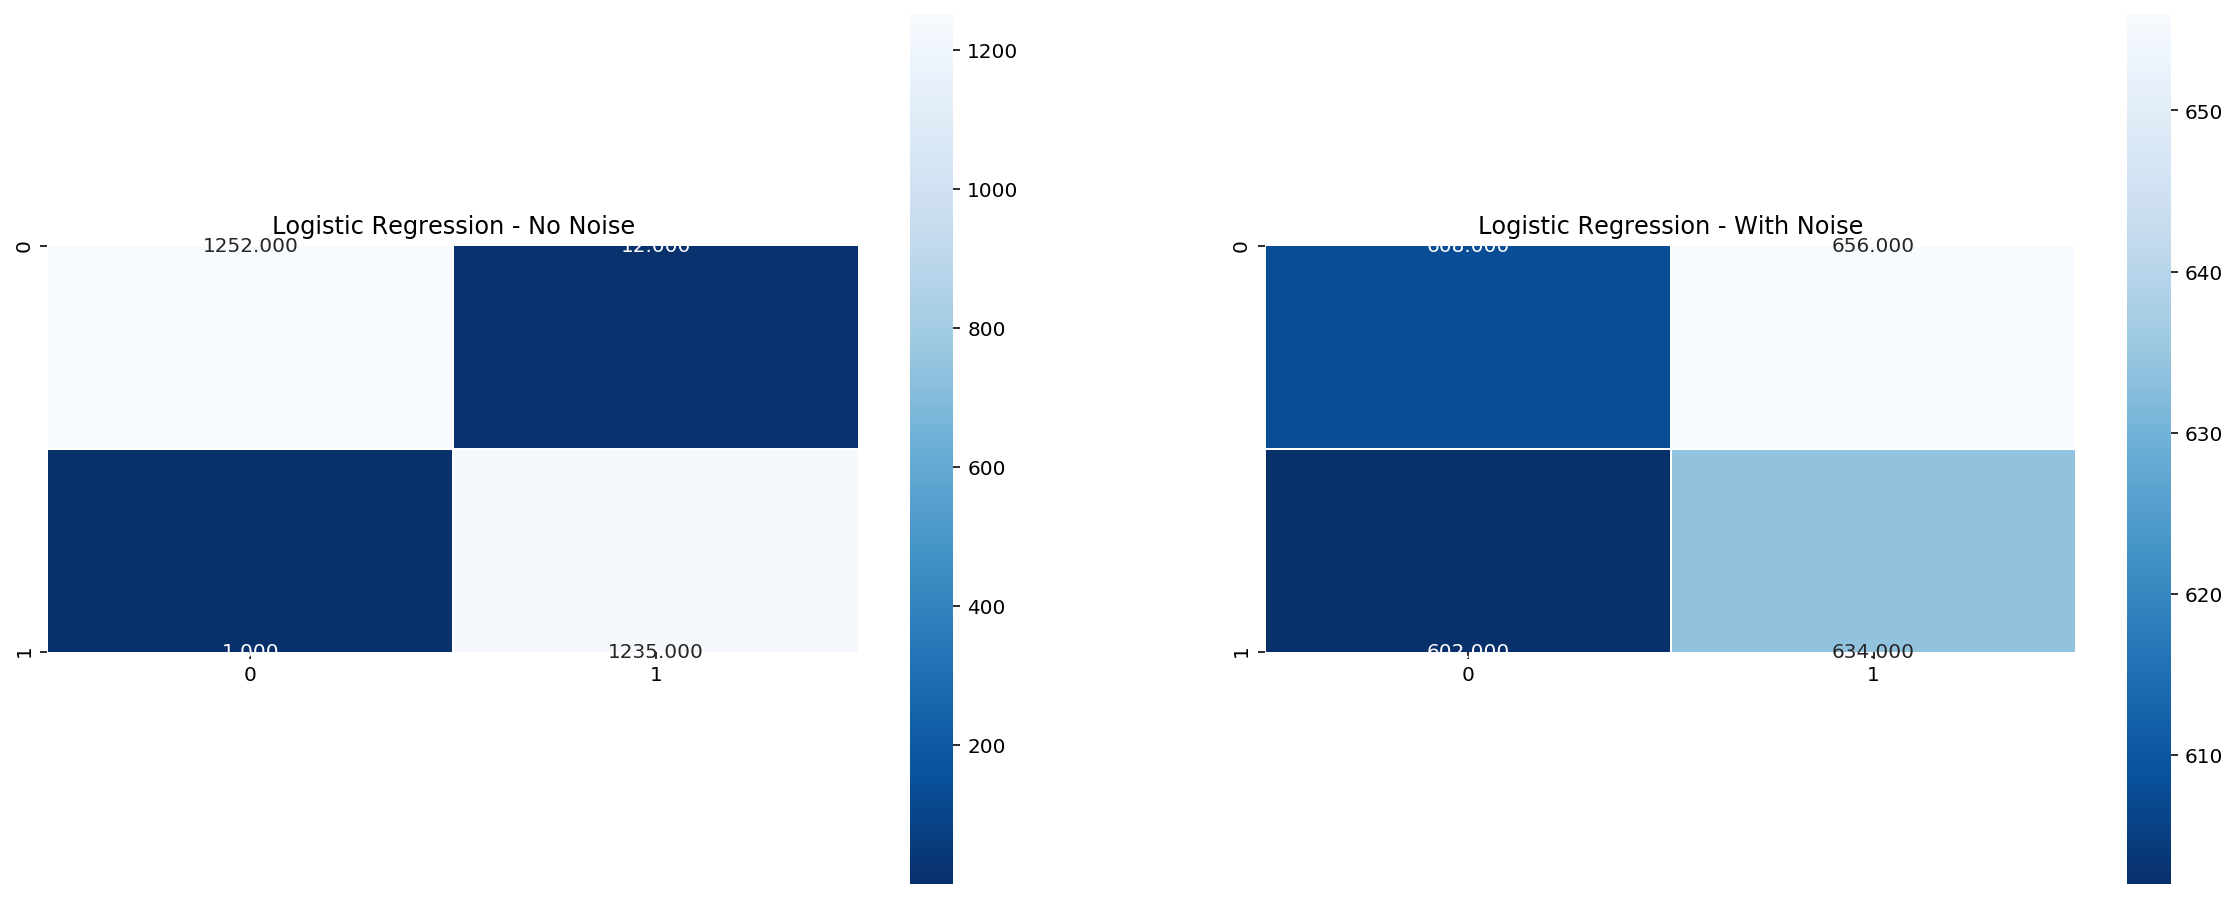

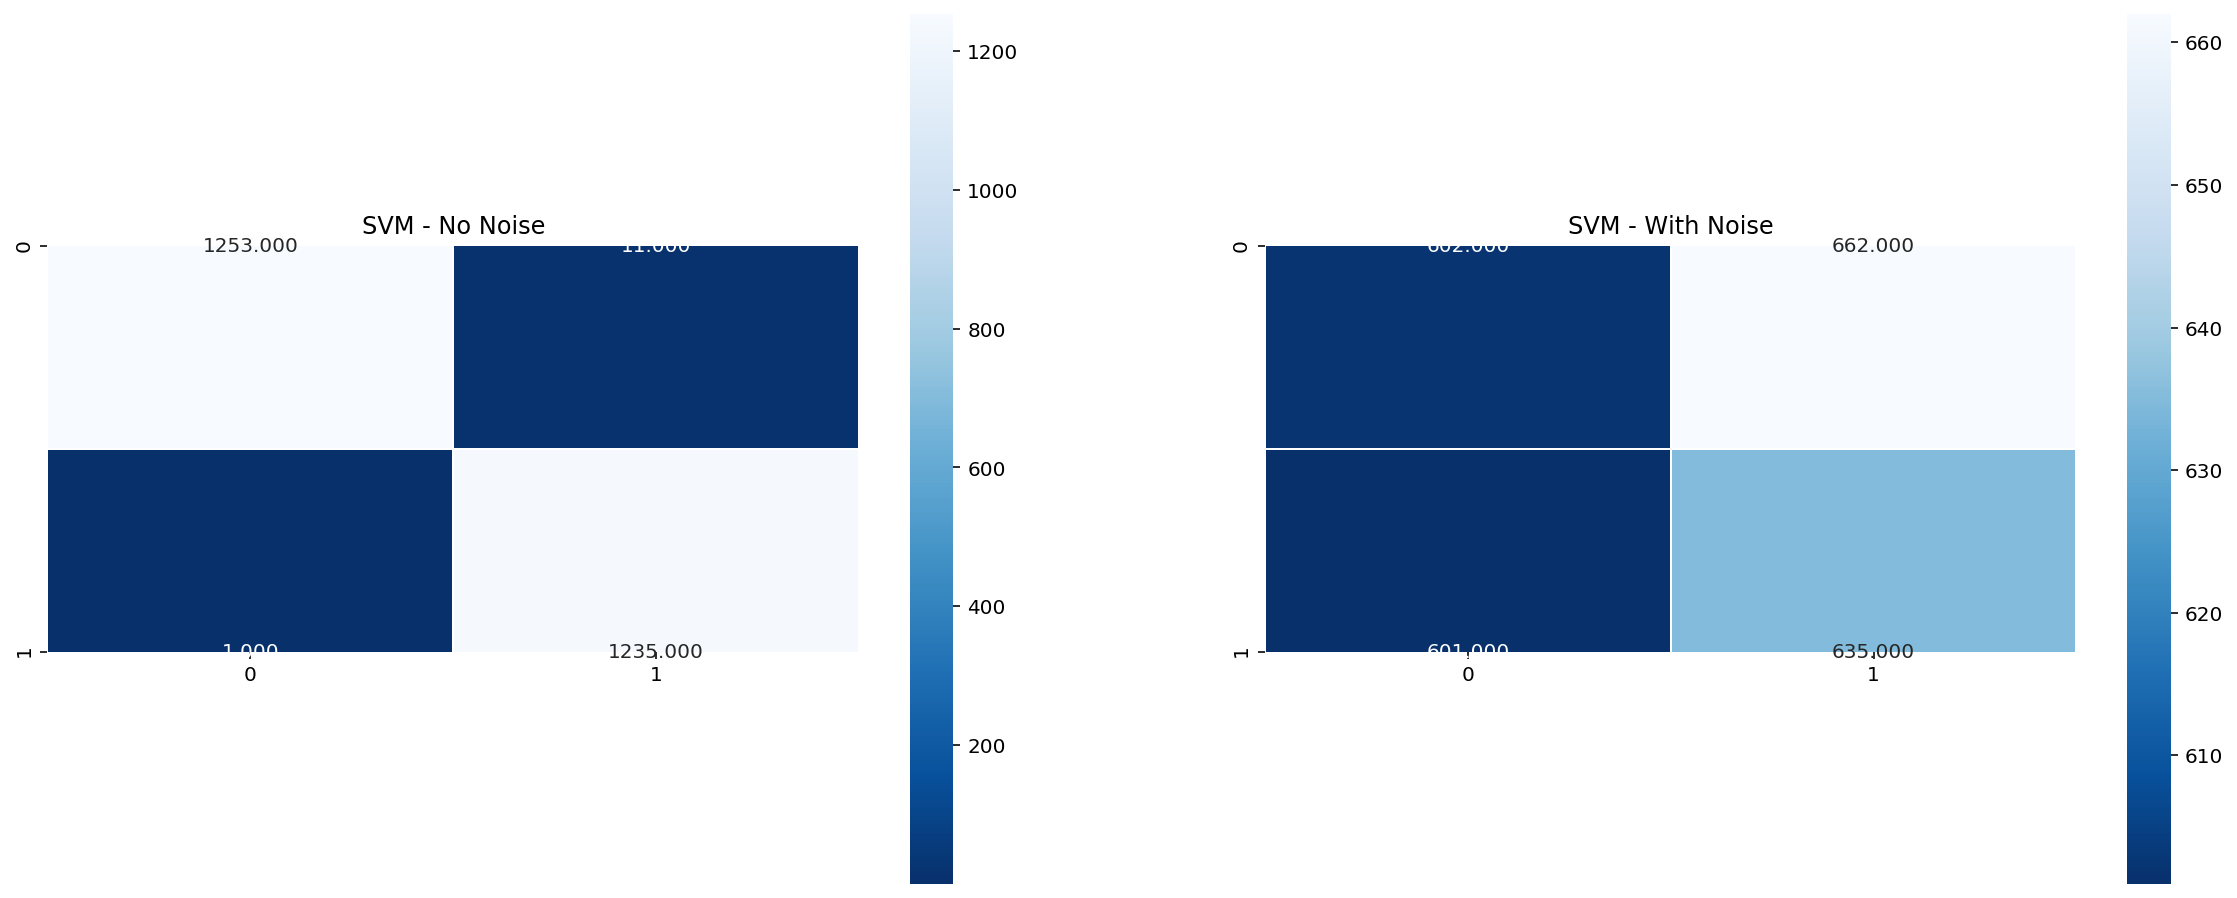

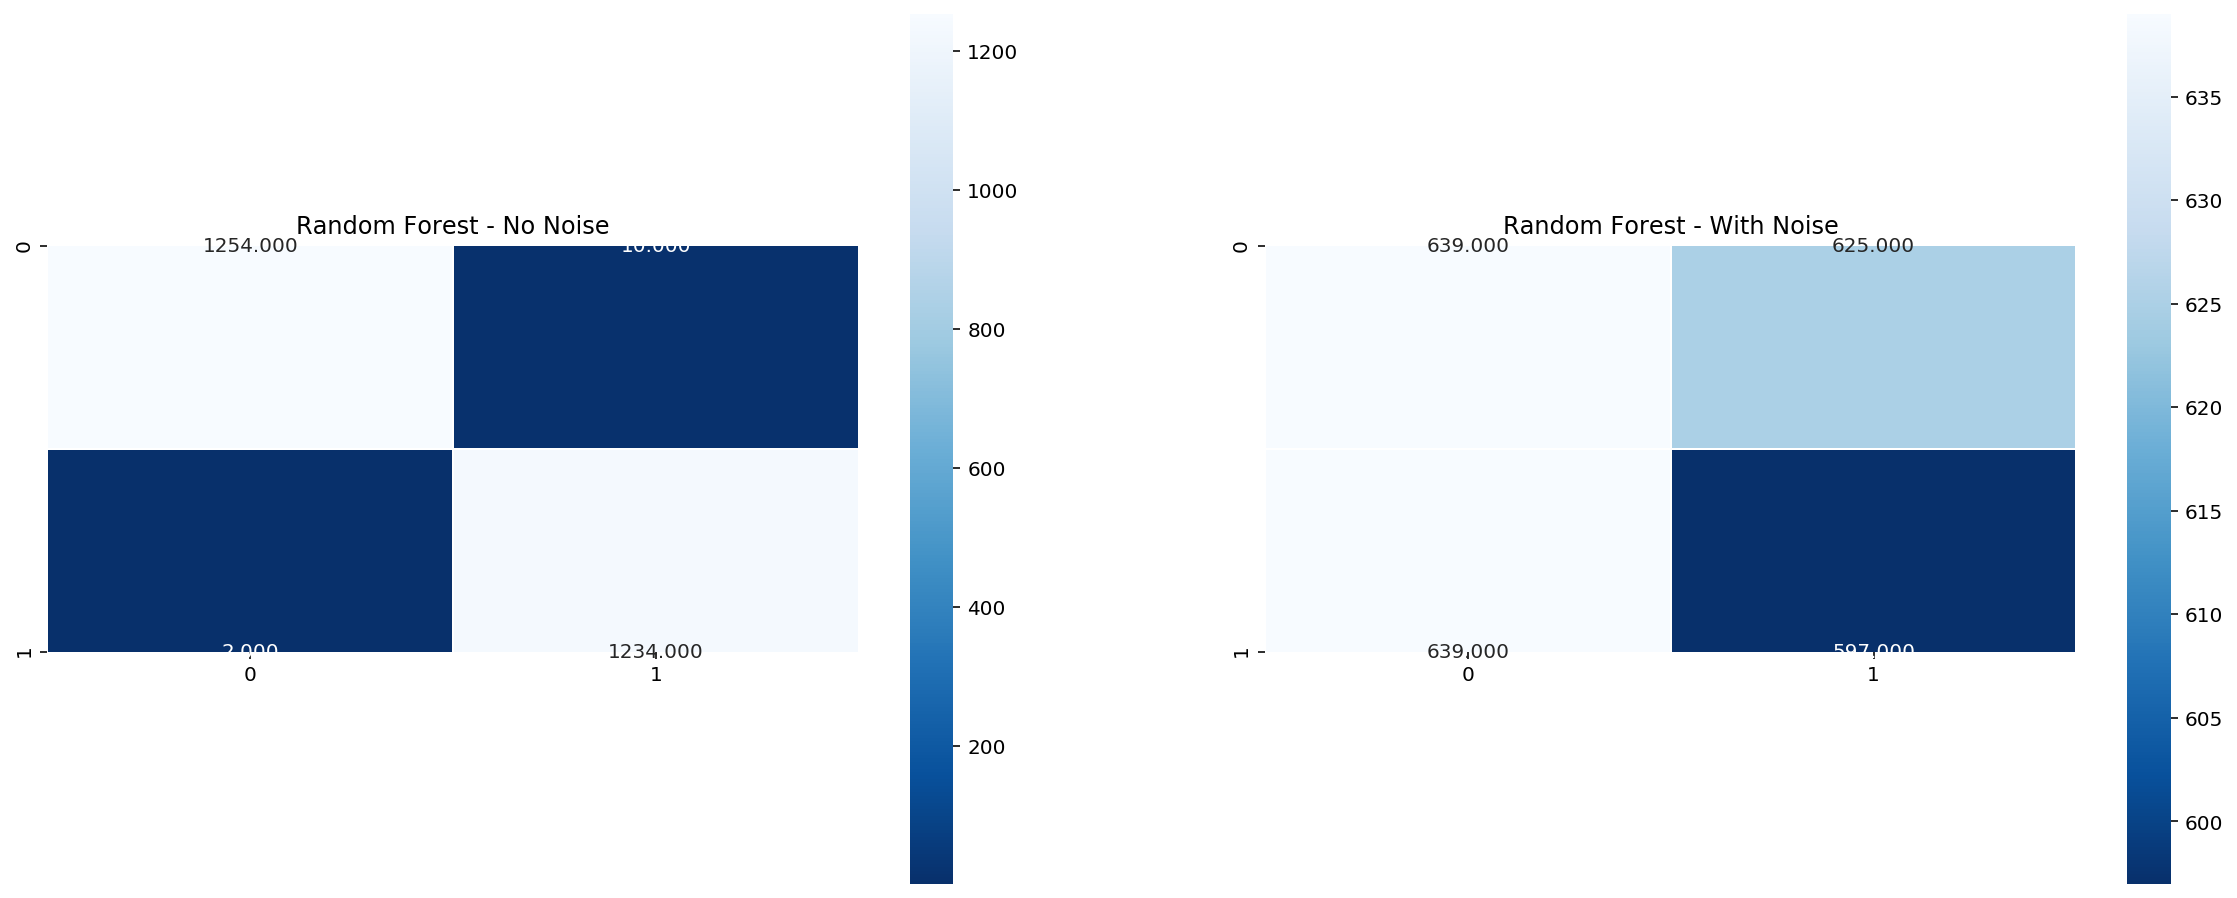

In [46]:
cm = metrics.confusion_matrix(ynn_test, predictionsLR)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax1);
ax1.set_title("Logistic Regression - No Noise")

cm = metrics.confusion_matrix(ynn_test, predictionsLRN)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax2);
ax2.set_title("Logistic Regression - With Noise")
plt.show();

cm = metrics.confusion_matrix(ynn_test, predictionsSVM)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax1);
ax1.set_title("SVM - No Noise")

cm = metrics.confusion_matrix(ynn_test, predictionsSVMN)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax2);
ax2.set_title("SVM - With Noise")
plt.show();

cm = metrics.confusion_matrix(ynn_test, predictionsRM)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax1);
ax1.set_title("Random Forest - No Noise")

cm = metrics.confusion_matrix(ynn_test, predictionsRMN)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax2);
ax2.set_title("Random Forest - With Noise")
plt.show();

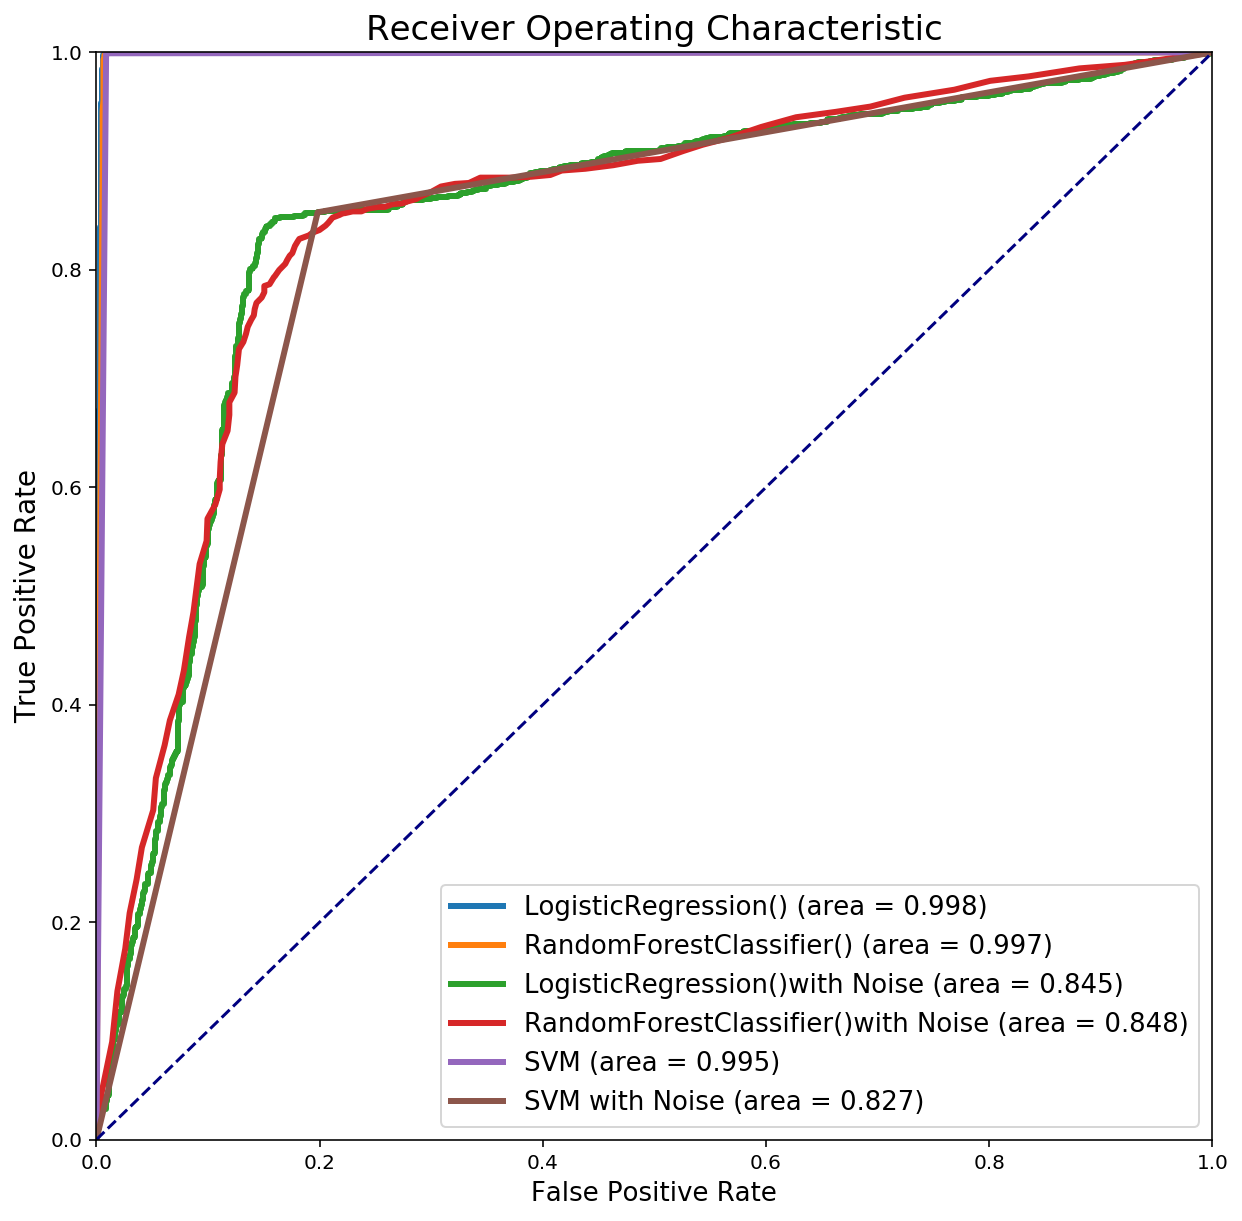

In [47]:
# plot the ROC curves
plt.figure(figsize=(10,10))

model_name = [logisticRegr, randomforest]

for i in range(2):
    ynn_pred = model_name[i].predict_proba(xnn_test)[:,1]
    fpr, tpr, thresholds = roc_curve(ynn_test, ynn_pred)
    plt.plot(fpr, tpr, lw=3, label=str(model_name[i]) + ' (area = %0.3f)' % auc(fpr, tpr))
    
    
model_name = [logisticRegrN, randomforestN]

for i in range(2):
    yN_pred = model_name[i].predict_proba(xN_test)[:,1]
    fpr, tpr, thresholds = roc_curve(yN_test, yN_pred)
    plt.plot(fpr, tpr, lw=3, label=str(model_name[i]) + 'with Noise'+ ' (area = %0.3f)' % auc(fpr, tpr))

ynn_pred = svmn.predict(xnn_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(ynn_test, ynn_pred)
plt.plot(fpr, tpr, lw=3, label='SVM (area = %0.3f)' % auc(fpr, tpr))

yN_pred = svmN.predict(xN_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(yN_test, yN_pred)
plt.plot(fpr, tpr, lw=3, label='SVM with Noise (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

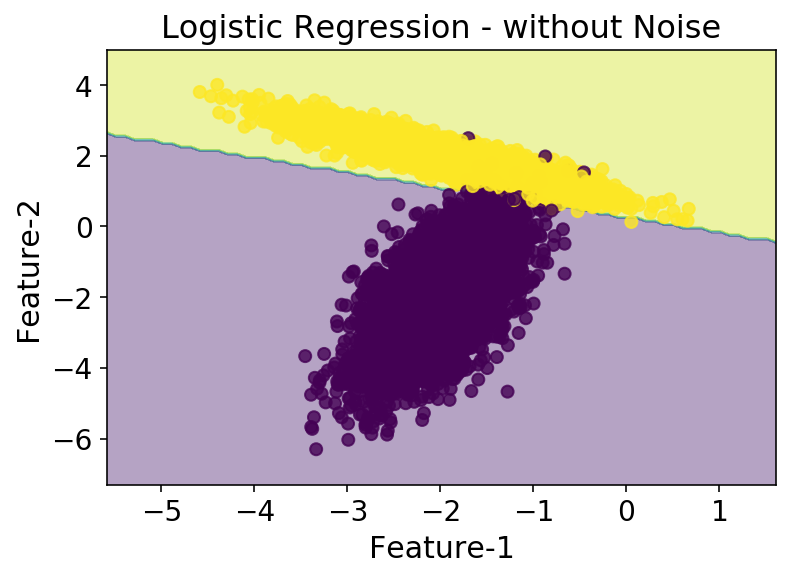

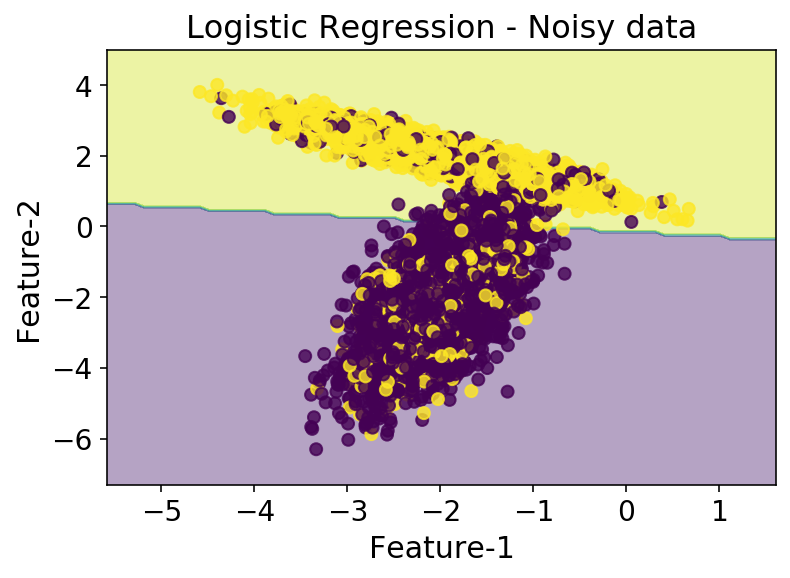

In [48]:
plt.figure()
plt.title("Logistic Regression - without Noise",fontsize=16)
plot_decision_boundaries(X,y,LogisticRegression)
plt.show()

plt.figure()
plt.title("Logistic Regression - Noisy data",fontsize=16)
plot_decision_boundaries(XN,yN,LogisticRegression)
plt.show()

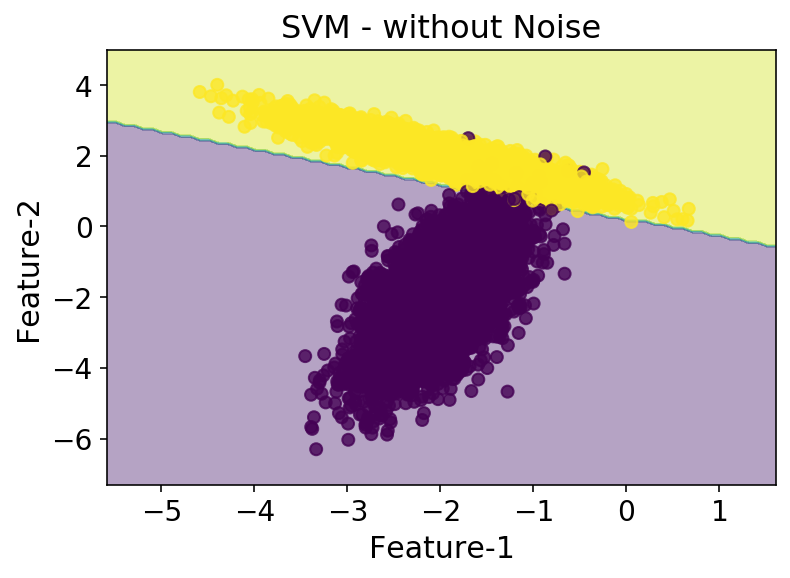

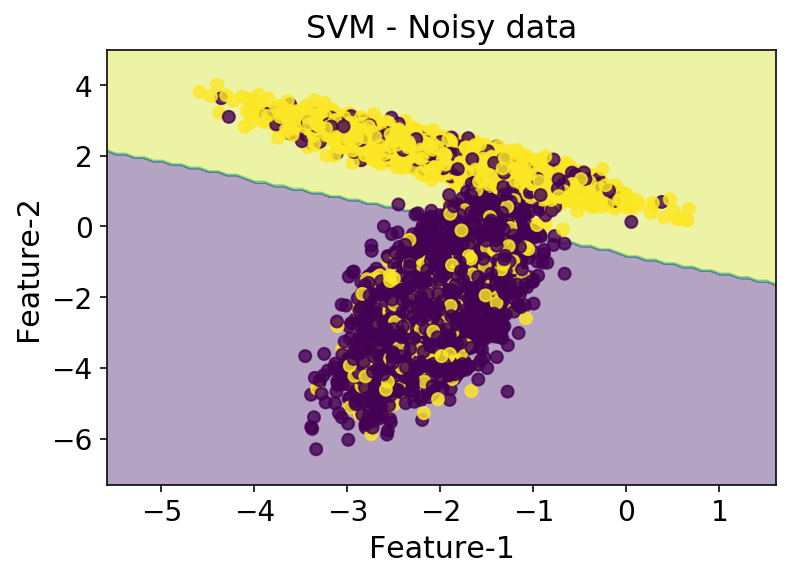

In [49]:
plt.figure()
plt.title("SVM - without Noise",fontsize=16)
plot_decision_boundaries(X,y,svm.SVC, kernel='linear')
plt.show()

plt.figure()
plt.title("SVM - Noisy data",fontsize=16)
plot_decision_boundaries(XN,yN,svm.SVC, kernel='linear')
plt.show()

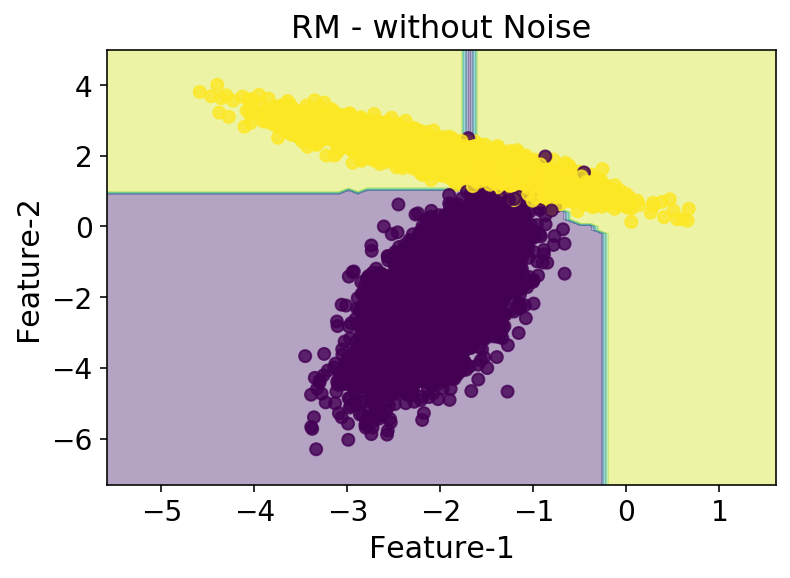

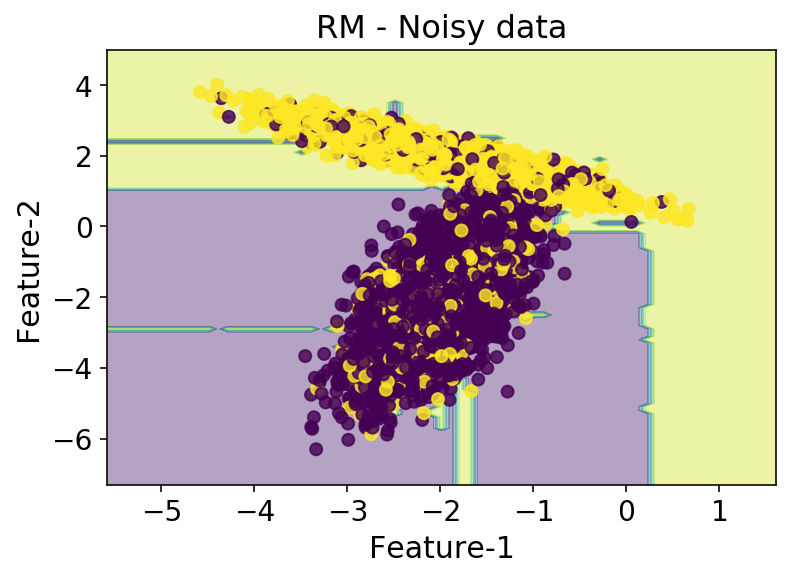

In [50]:
plt.figure()
plt.title("RM - without Noise",fontsize=16)
plot_decision_boundaries(X,y,RandomForestClassifier)
plt.show()

plt.figure()
plt.title("RM - Noisy data",fontsize=16)
plot_decision_boundaries(XN,yN,RandomForestClassifier)
plt.show()

#### Results


It is evident that for all the models, adding noise to the data will lower the accuracy of the models. 
- For Logistic Regression, it dropped by 15%
- For SVM, it dropped by 15% also 
- For RM, it dropped by 17% approximately 

With the ROC curves we can compare all the models, with and without noise in the datasets, via one graph. LR and SVM have practically the same level of performance. They both maintain  solid predictions even through the noisy dataset. RM is also net far a way, but is less performant than the other two. 

The plotted decision boundaries are the best ways to compare these models. For all three models, the noise changes the boudaries in a non negligeable way. But as we expected, LR and SVM keep their boundaries clean and visualisable. We can see that they sometimes take into consideration the noise, but for most of the noisy points, they just ignore them. That is a sign of  a rigid model. On the other side, the decision boundary of the RM clearly shows why this model is worth than the other two. We can clearly see that this model overfits the data. It fits the noise, and considers it as correct data points. Indeed, this model studies too well our training sample, and will have the worse out of sample performance since it is stuck in the in sample performance. This is a consequence of overfitting.

### Conclusion
As a conclusion to this project, let us summerize what we have done. At first, we presented three Machine Learning Classification Models, Logistic Regression, Support Vector Machine and Random Forest Classifier. After talking in details about these algorithms, we showed how they worked, on a real dataset, trying to solve a real-life problem.

Then we gained interest in the way these different algorithms perform on a specific problem. The goal of this second part was to study the impact of noisy data on the performance. We defined multiple metrics that would help us compare the models performance, we then generated two synthetic datasets, a noise-less and a noisy one. We trained and tested our models on both the datasets. After that, we compared the results using the accuracy of each and every model, the confusion matrix, the ROC curve as well as the decision boundaries drawn by each model.

To conclude on a personnal note, I am happy to say that this project was a fantastic way to learn a lot of information about machine learning and every aspect of it. I got the chance to discover many Python libraries, as well as many different algorithms, metrics, methods that are commonly used in today's digital world.